# Boston Housing Dataset

The Boston housing dataset is a famous dataset from the 1970s. 

Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes that are available.

### Aim:

In total, there are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

# Importing Library

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data

In [44]:
from sklearn.datasets import load_boston

boston_data = load_boston()

In [45]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [46]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Loading boston data into Dataframe

In [47]:
data = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

In [48]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Augment new column MEDV

MEDV indicates the prices of the houses and is the target variable. The rest of the variables are the predictors based on which we will predict the value of the house.

We need Median Value. boston.data contains only the features, no price value.

In the above result, we can see that the target variable ‘MEDV’ is missing from the data. We will create a new column of target values and add them to the dataframe.

In [49]:
data['MEDV'] = boston_data.target #created a new column median value 

In [50]:
data.head() #now entire column numbers are 14 including MEDV

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [52]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Preprocessing

#### Checking number of missing values

In [53]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

isnull() shows : there is no null value present.

But generally, NaN or missing values can be in any form like 0, ? or may be written as “missing ” and in our case, as we can see above there are a lot of 0’s, so we can replace them with NaN to calculate how much data we are missing.

we’ll turn the 0 values into np.nan where we can see what is missing.

In [55]:
data.shape

(506, 14)

# Replacing null values

In [56]:
data.replace(0, np.nan, inplace=True)

# Check what percentage of each column's data is missing

In [57]:
data.isnull().sum()/len(data)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

This shows that 73% of the ZN feature and 93% of CHAS feature are missing. We will leave them out of our variables to test as they do not give us enough information for our regression model to interpret.

### Drop ZN and CHAS with too many missing columns

In [58]:
data = data.drop('ZN', axis = 1)
data = data.drop('CHAS', axis = 1)

In [59]:
data.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Explotary Data Analysis

We will first plot the distribution of the target variable MEDV. For this we will use the distplot() function from the seaborn library.

c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


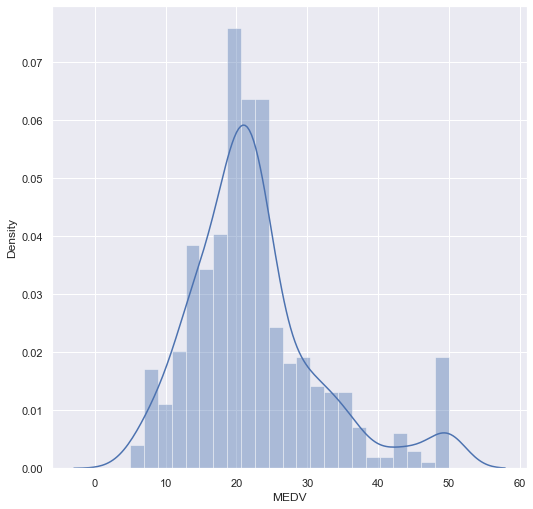

In [60]:
sns.distplot(data['MEDV'])
plt.show()

the values of MEDV is normally distributed with some of the outliers.

# Check Multicollinearity

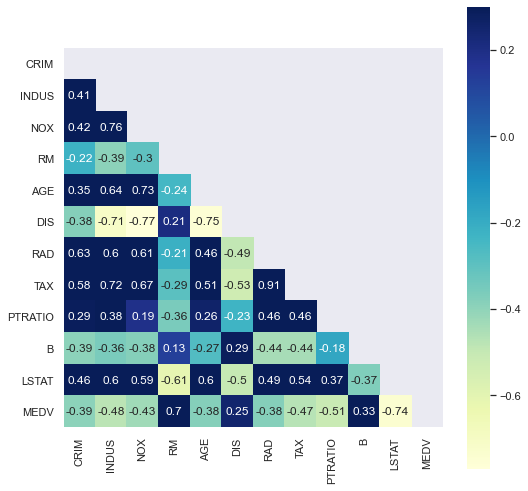

In [61]:
#Heatmap for numerical columns and calculate correlation between different variables
#https://stackoverflow.com/questions/53822194/python-generate-a-mask-for-the-lower-triangle-of-a-matrix

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle and steps to remove redundant values
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(data.corr().round(2), square=True,vmax = .3, cmap='YlGnBu', annot=True, mask=mask);

Analysis of heatmap

From heatmap, we can observe that

1) cut off for high correlation is +-.75

2) TAX and RAD have a high correlation of 0.91

3) NOX and INDUS have a high correlation of 0.76

4) DIS and NOX have a high correlation of -0.77

# Drop all these values for better accuracy.

also, MEDV has high correlation with RAM and LSTAT 0.7 and -0.74 respectively

but, RAD and TAX are strongly correlated, so we don’t include this in our features together to avoid multicollinearity.

Similar to the features DIS and AGE which have a correlation of -0.75. So we will exclude these four features from our features list. 

Reason: [here](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r/1150#1150)

For Reference:

MEDV = Median value of house

RM = Avg number of rooms per house

LSTAT = Neighborhood Affluence

Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

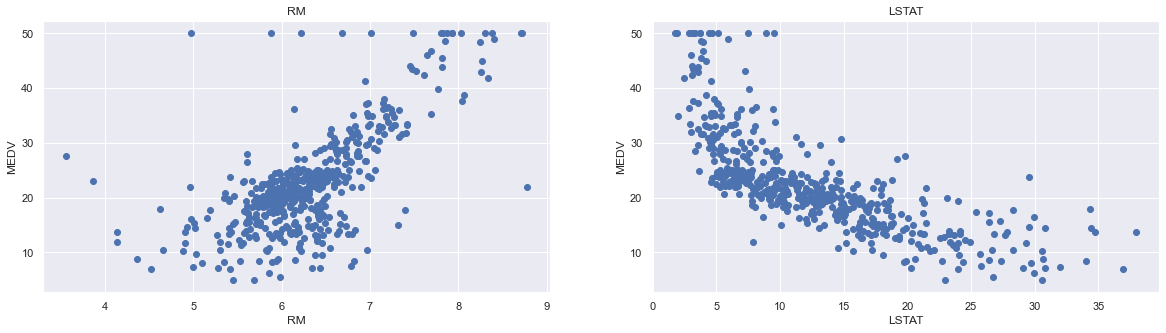

In [70]:
plt.figure(figsize=(20, 5))

features = ['RM','LSTAT']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Analysing the graph

From the above visualization,

1) we can conclude that MEDV and RM are linearly correlated and MEDV increase with an increase in RM which is no. of rooms and looks like both are following a linear relationship.

2) Also when LSTAT increases MEDV or PRICE decreases.

# Create Model

In [75]:
# https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.c_.html
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns = ['LSTAT','RM'])
Y = data['MEDV']

In [76]:
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


## Using train_test split

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


# Applying Linear Regression on Boston housing data
### Training and Testing the model

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create LinearRegression Instance
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, Y_train)

# Predict
Y_predicted = lrm.predict(X_test)

### Evaluate Model with Metrics

Let’s evaluate how well our model did using metrics r-squared and root mean squared error (rmse).

1) The r-squared value shows how strong our features determined the target value.

2) The rmse defines the difference between predicted and the test values. The higher the value of the rmse, the less accurate the model.

In [81]:
from sklearn.metrics import mean_squared_error

def linear_metrics():
    
    r2 = lrm.score(X_test, Y_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, Y_predicted)))
    print(f'r-squared: {r2}')
    print('---------------------------------------')
    print(f'root mean squared error: {rmse}')
linear_metrics()

r-squared: 0.6628996975186954
---------------------------------------
root mean squared error: 5.13740078470291


we have computed R squared, defined as the metric which quantifies the amount of variance in the target variable that is predicted from the feature variable.

With an r-squared value of .66, the model is not terrible but it’s not perfect. 

This could be improved by:

* bigger dataset
* better features or maybe more features
* remove outliers
* perform optimization techniques like Lasso and Ridge

The root mean squared error we can interpret that on average we are 5.1k dollars off the actual value.

# Actual Vs. Predicted Price Plot

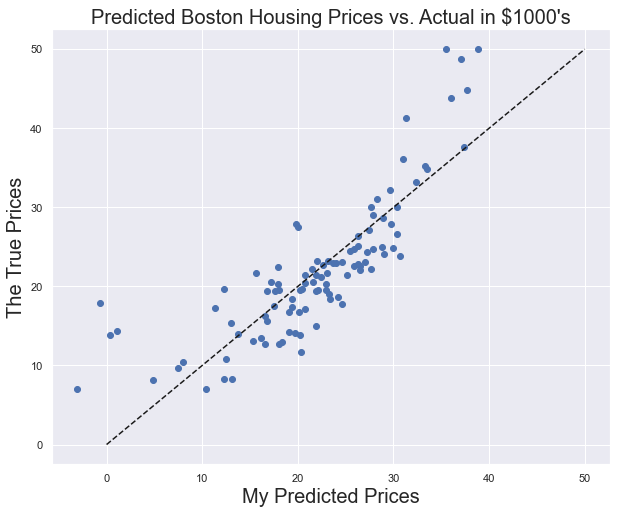

In [83]:
#Let’s also plot a Scatter Plot on training label set and predicted label set which should in an ideal case follow a straight line.

# Plot my predictions vs actual

plt.figure(figsize=(10,8))
plt.scatter(Y_predicted, Y_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('The True Prices', fontsize=20);


plt.xlabel('My Predicted Prices', fontsize=20);
plt.title("Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

# Applying Polynomial Regression on Boston housing data

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def create_polynomial_regression_model(degree):
    
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [93]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.703071027847756
R2 score of training set is 0.7425094297364765


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.78481988454502
R2 score of test set is 0.8170372495892197


Polynomial regression with degree 2 is better than the linear regression